In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
# df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group", "Date Hour", "Users", "Sessions", "Engaged Sessions", "Average Engagement time Per Session", "Engaged Sessions Per User", "Events Per Session", "Engagement Rate", "Event Count"]

In [5]:
df["Date Hour"] = pd.to_datetime(df["Date Hour"], format = "%Y%m%d%H") # We can give errors = "coerce" for the errors occurring.....

In [6]:
numeric_cols = df.columns.drop(["Channel Group", "Date Hour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df["Hour"] = df["Date Hour"].dt.hour

# Sessions And Users Over Time 

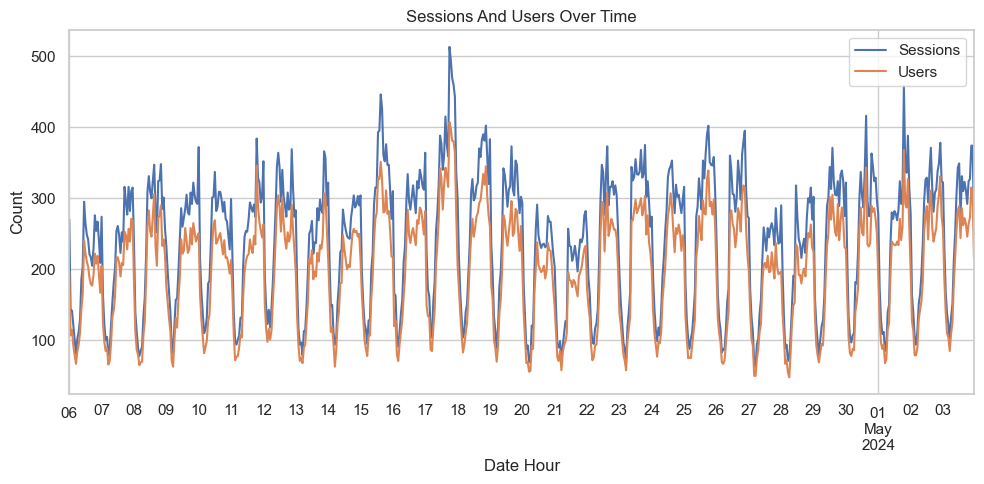

In [8]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10,5))
df.groupby("Date Hour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions And Users Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Total Users By Channles...

C:\Users\mk108\AppData\Local\Temp\ipykernel_4404\2933781728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = "Channel Group", y = "Users", estimator = np.sum, palette = "viridis")


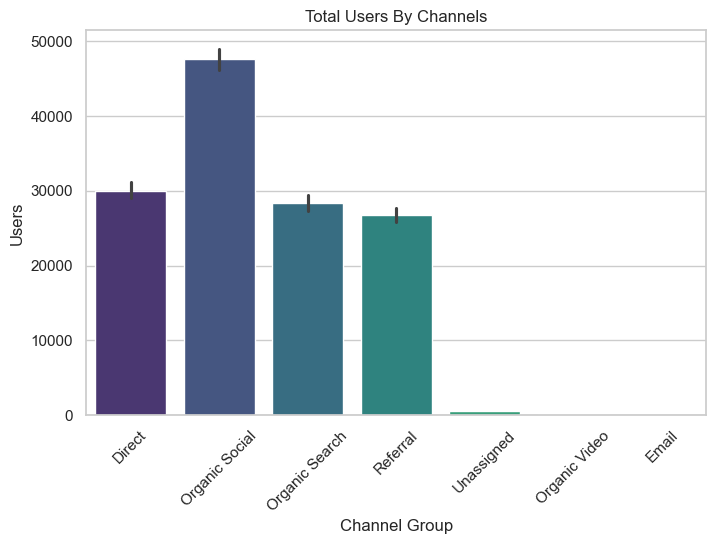

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x = "Channel Group", y = "Users", estimator = np.sum, palette = "viridis")
plt.title("Total Users By Channels")
plt.xticks(rotation=45)
plt.show()

# Average Engagement Time By Channel....

C:\Users\mk108\AppData\Local\Temp\ipykernel_4404\759951224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = "Channel Group", y = "Average Engagement time Per Session", estimator = np.mean, palette = "magma")


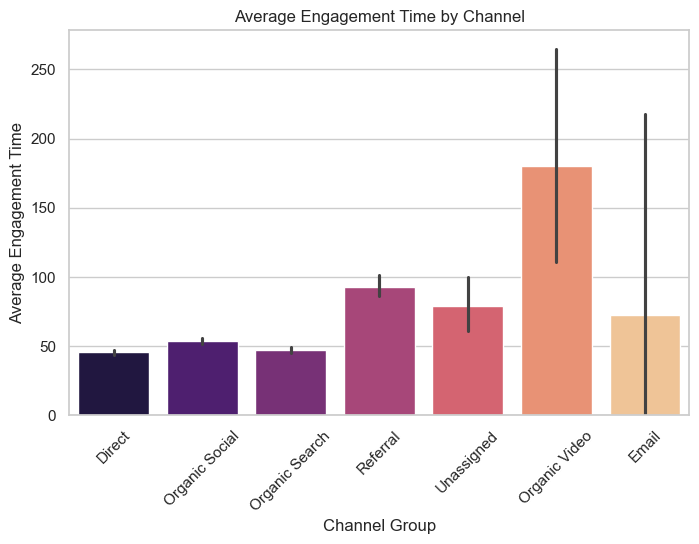

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x = "Channel Group", y = "Average Engagement time Per Session", estimator = np.mean, palette = "magma")
plt.title("Average Engagement Time by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Average Engagement Time")
plt.xticks(rotation=45)
plt.show()

# Engagement Rate Distribution By Channles...

C:\Users\mk108\AppData\Local\Temp\ipykernel_4404\1127364060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = "Channel Group", y = "Engagement Rate", palette = "coolwarm")


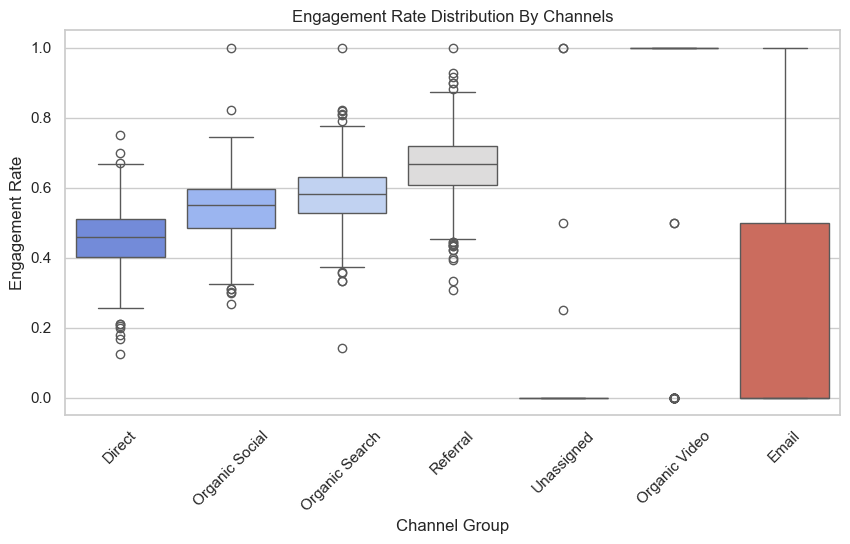

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x = "Channel Group", y = "Engagement Rate", palette = "coolwarm")
plt.title("Engagement Rate Distribution By Channels")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.show()

# Engaged VS Non Engaged Sessions...

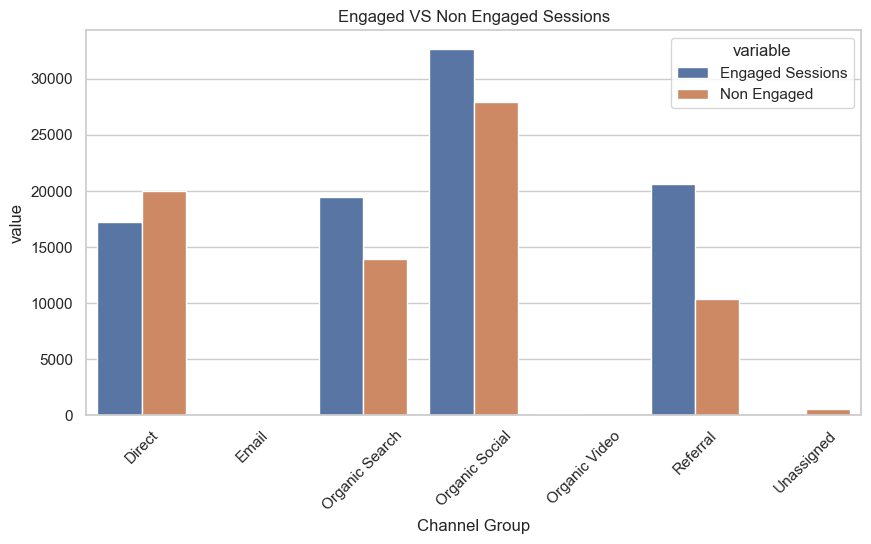

In [16]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars= "Channel Group", value_vars = ["Engaged Sessions", "Non Engaged"])

plt.figure(figsize=(10,5))
sns.barplot(data=session_df_melted, x = "Channel Group", y = "value", hue = "variable")
plt.title("Engaged VS Non Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Traffic By Hour And Channels...

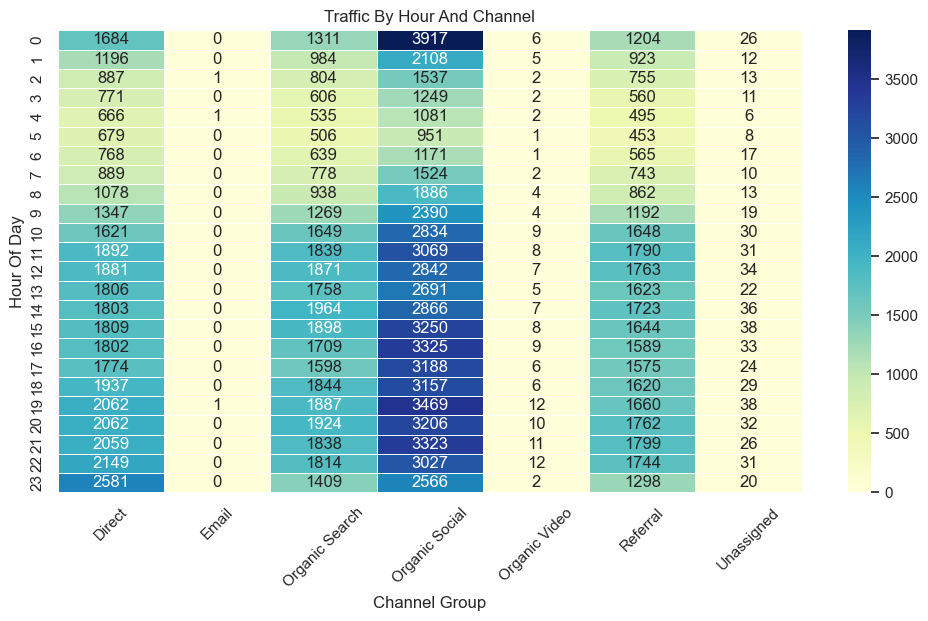

In [18]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap = "YlGnBu", linewidth = .5, annot= True, fmt = ".0f")
plt.title("Traffic By Hour And Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour Of Day")
plt.xticks(rotation=45)
plt.show()

# Engagement Rate VS Sessions...

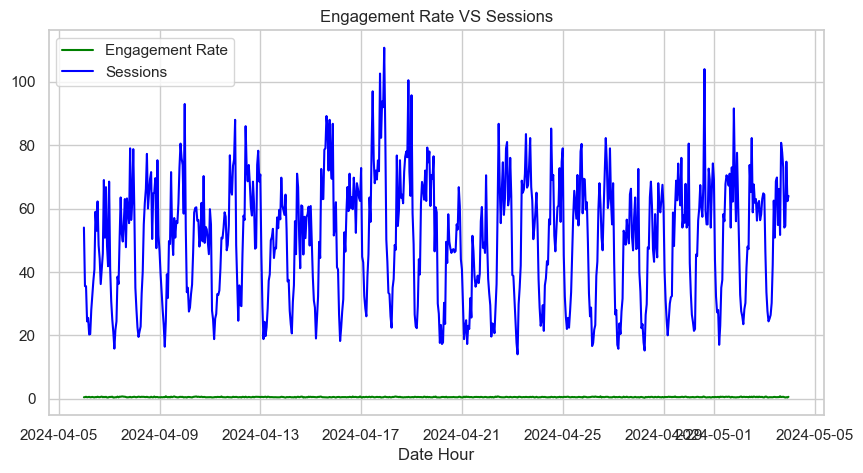

In [20]:
df_plot = df.groupby("Date Hour")[["Engagement Rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["Date Hour"], df_plot["Engagement Rate"], label = "Engagement Rate", color = "green")
plt.plot(df_plot["Date Hour"], df_plot["Sessions"], label = "Sessions", color = "blue")
plt.title("Engagement Rate VS Sessions")
plt.xlabel("Date Hour")
plt.legend()
plt.grid(True)
plt.show()